In [3]:
import pandas as pd

file_path = '../../data/student-graduation/graduation_dataset.csv'
data = pd.read_csv(file_path)

data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
file_path = '../../data/student-graduation/graduation_dataset.csv'
data = pd.read_csv(file_path)

# Step 1: Data Exploration
# Display initial rows and summary statistics
print("First five rows of the dataset:")
print(data.head())
print("\nSummary statistics for numerical columns:")
print(data.describe())
print("\nData types and missing values:")
print(data.info())

# Identifying unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")

# Step 2: Data Cleaning
# a. Handling Missing Values
# Numerical columns: Impute with mean
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='mean')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# Categorical columns: Impute with most frequent (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])

# Check for remaining missing values
print("\nMissing values after imputation:")
print(data.isnull().sum())

# Step 3: Data Transformation
# a. Encoding Categorical Data
# Apply Label Encoding or One-Hot Encoding based on the unique values
encoded_data = data.copy()
for col in categorical_columns:
    if data[col].nunique() <= 10:
        # One-Hot Encoding for columns with fewer unique values
        encoded_data = pd.get_dummies(encoded_data, columns=[col], drop_first=True)
    else:
        # Label Encoding for columns with many unique values
        le = LabelEncoder()
        encoded_data[col] = le.fit_transform(data[col])


# b. Feature Scaling
# Applying Z-score Scaling to standardize the features
scaler = StandardScaler()
encoded_data[num_cols] = scaler.fit_transform(encoded_data[num_cols])


# Display the first few rows of the processed data
print("\nFirst five rows of the transformed dataset:")
print(encoded_data.head())


First five rows of the dataset:
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6 

Marital status: 505 outliers detected
Application order: 541 outliers detected
Daytime/evening attendance: 483 outliers detected
Previous qualification: 707 outliers detected
Nacionality: 110 outliers detected
Mother's occupation: 84 outliers detected
Father's occupation: 84 outliers detected
Educational special needs: 51 outliers detected
Debtor: 503 outliers detected
Tuition fees up to date: 528 outliers detected
Scholarship holder: 1099 outliers detected
Age at enrollment: 441 outliers detected
International: 110 outliers detected
Curricular units 1st sem (credited): 577 outliers detected
Curricular units 1st sem (enrolled): 424 outliers detected
Curricular units 1st sem (evaluations): 158 outliers detected
Curricular units 1st sem (approved): 180 outliers detected
Curricular units 1st sem (grade): 726 outliers detected
Curricular units 1st sem (without evaluations): 294 outliers detected
Curricular units 2nd sem (credited): 530 outliers detected
Curricular units 2nd sem (enrolled):

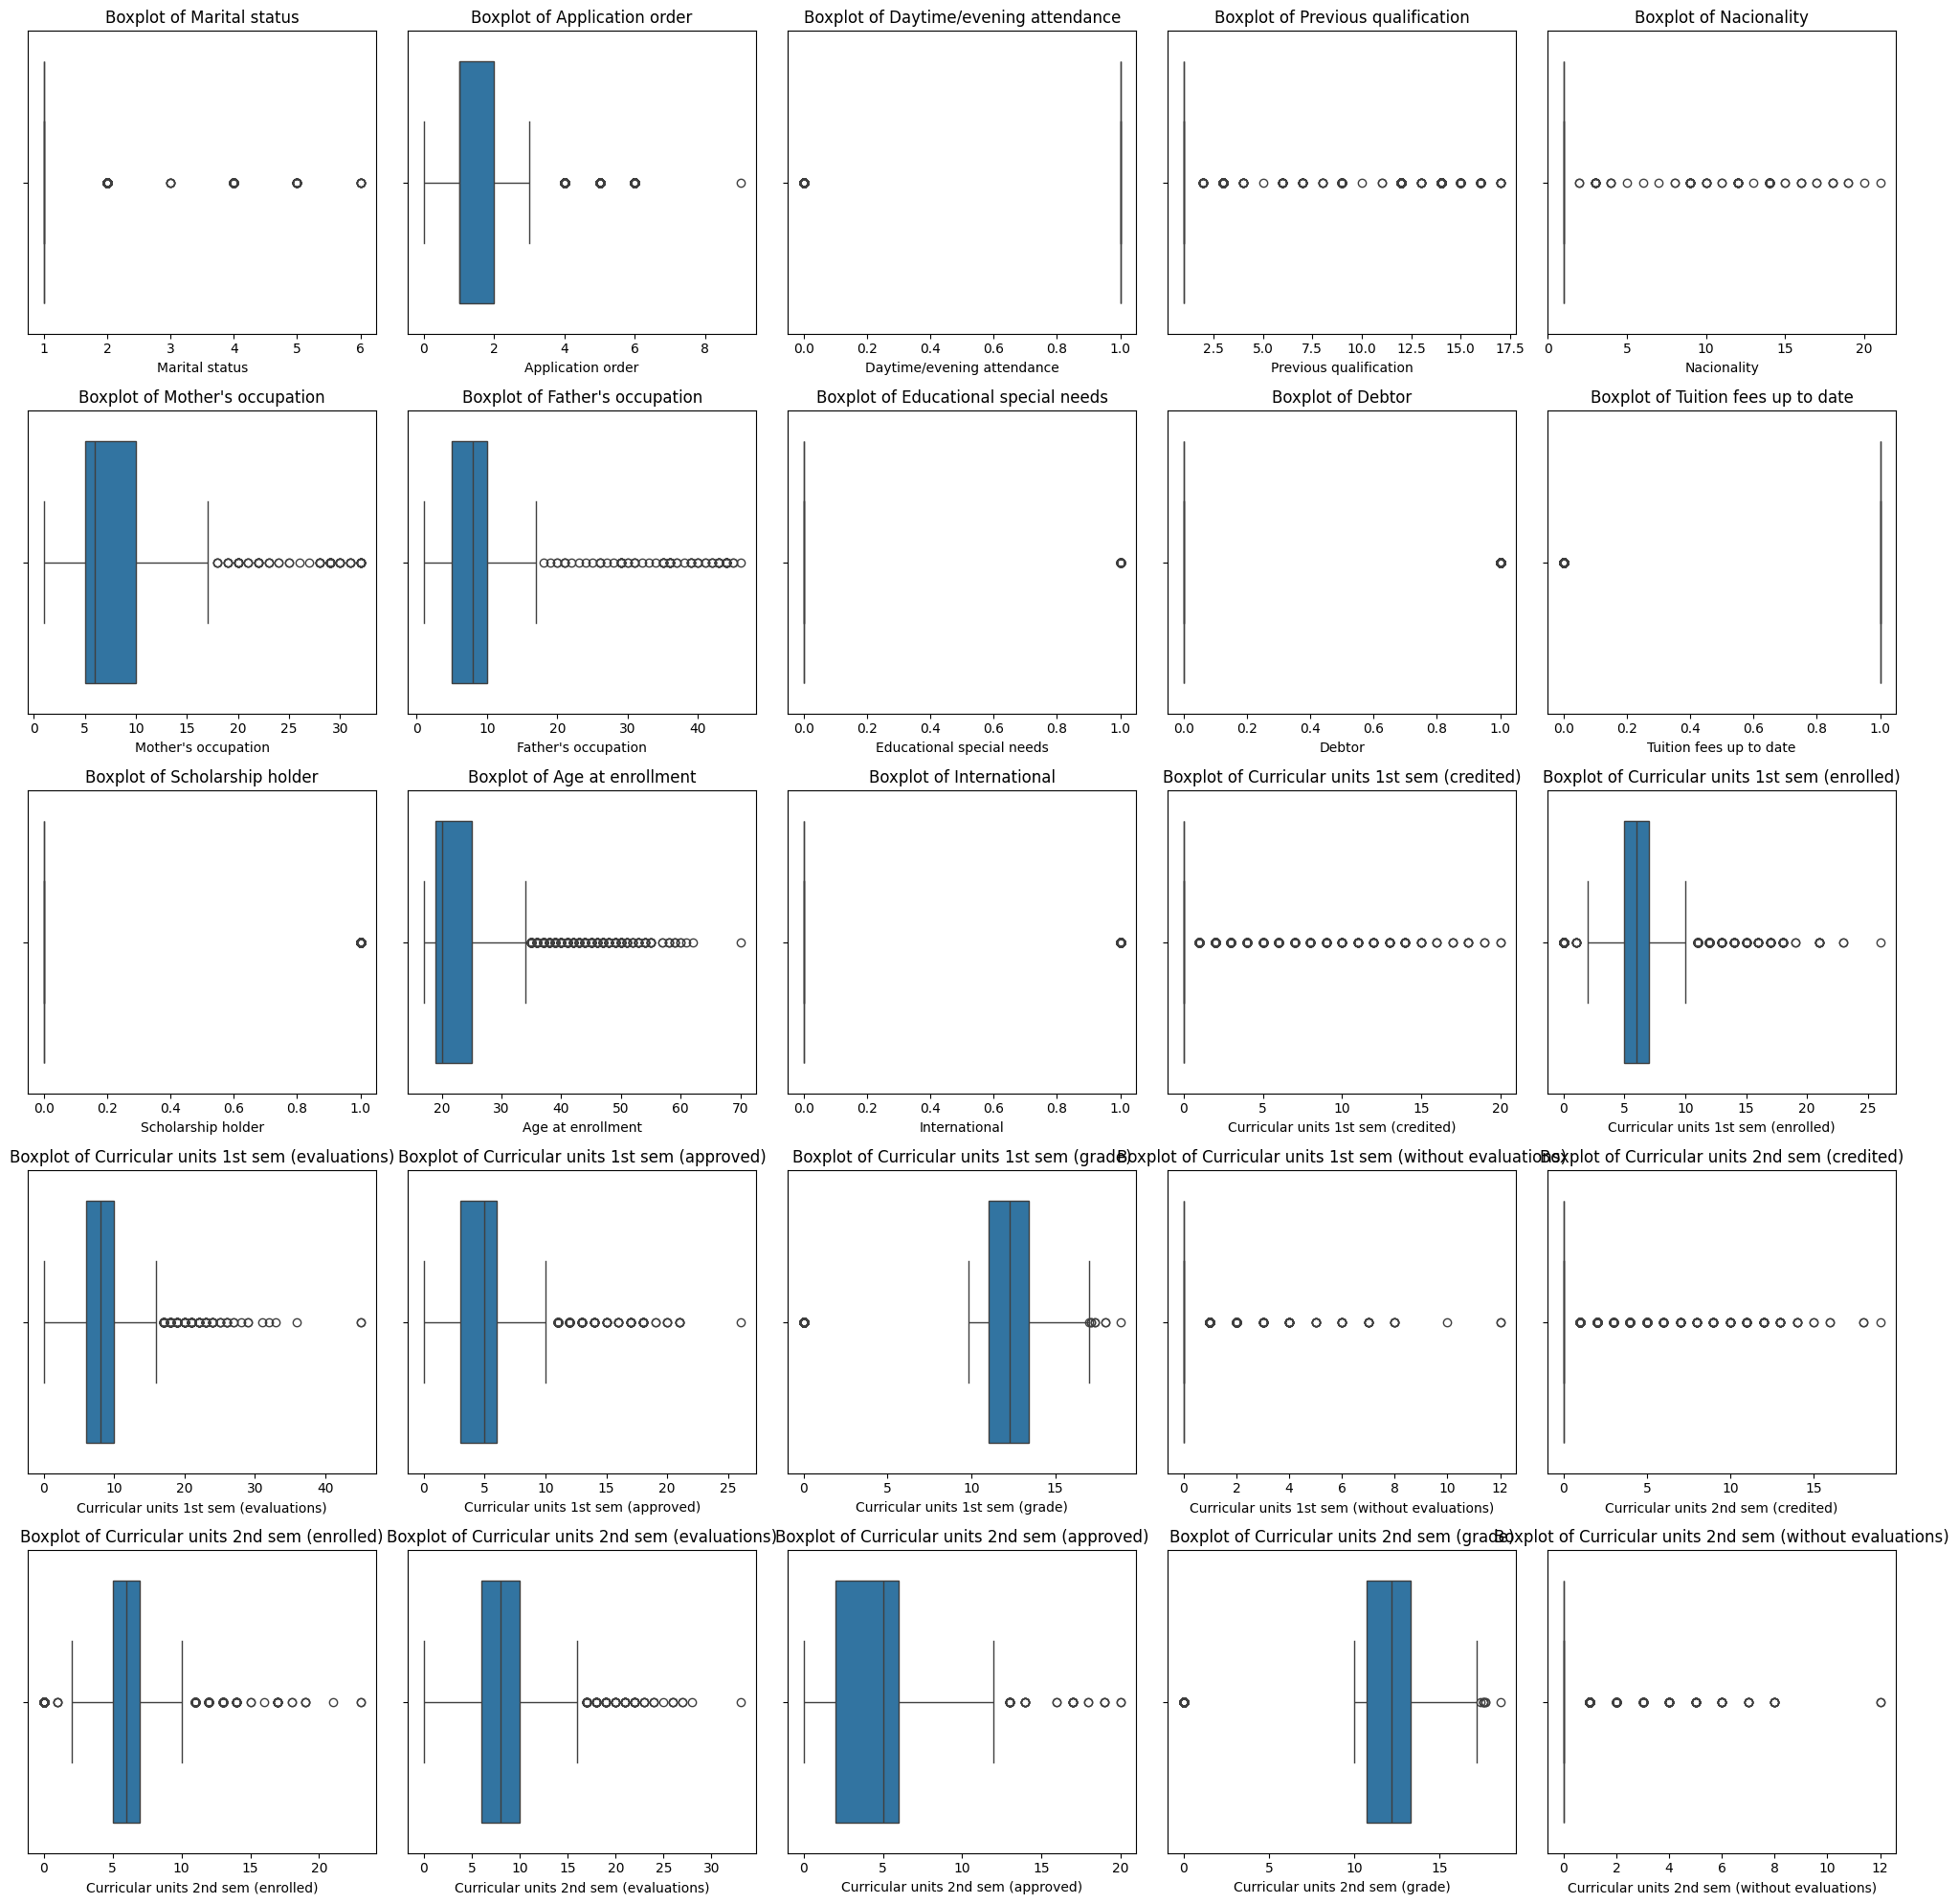

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Load your data
data = pd.read_csv('../../data/student-graduation/graduation_dataset.csv')

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number', 'float64'])
numeric_data = numeric_data.dropna(axis=1, how='all')

# Function to detect outliers
def detect_outliers(df):
    outliers = {}
    
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        if outlier_mask.sum() > 0:
            outliers[column] = df[column][outlier_mask]
            print(f"{column}: {outlier_mask.sum()} outliers detected")
    
    return outliers

# Detect outliers
outliers = detect_outliers(numeric_data)

# Set up the figure with rows of 5 plots
num_columns = len(outliers.keys())
num_rows = math.ceil(num_columns / 5)  # Calculate the required number of rows
fig, axs = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))  # Adjust the figure size
axs = axs.flatten()  # Flatten the axes array for easy indexing

# Plot each boxplot for columns with detected outliers
for plot_index, column in enumerate(outliers.keys()):
    sns.boxplot(x=numeric_data[column].dropna(), ax=axs[plot_index])
    axs[plot_index].set_title(f'Boxplot of {column}', fontsize=12)

# Hide any unused subplots
for i in range(plot_index + 1, len(axs)):
    axs[i].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def cap_outliers(df, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df.quantile(lower_percentile)
    upper_bound = df.quantile(upper_percentile)
    # Clip values to the percentile bounds
    df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)
    return df_capped

def log_transform(df):
    df_log_transformed = df.apply(lambda x: np.log1p(x))
    return df_log_transformed

def transform_columns(df, columns_to_cap, columns_to_log_transform):
    df_transformed = df.copy()
    
    if columns_to_cap:
        df_transformed[columns_to_cap] = cap_outliers(df[columns_to_cap])
    
    if columns_to_log_transform:
        df_transformed[columns_to_log_transform] = log_transform(df[columns_to_log_transform])
    
    return df_transformed


columns_to_log_transform = [
    'Marital status', 'Application order', 'Daytime/evening attendance', 'Previous qualification',
    'Nacionality', "Mother's occupation", "Father's occupation", 'Educational special needs', 
    'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment', 
    'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (grade)', 
    'Curricular units 2nd sem (without evaluations)'
]

columns_to_cap = [
    'Application mode', 'Course', "Mother's qualification", "Father's qualification", 
    'Displaced', 'Gender', 'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
    'Unemployment rate', 'Inflation rate', 'GDP'
]

print("Skewness before transformation:")
print(numeric_data[columns_to_log_transform + columns_to_cap].skew())

transformed_data = transform_columns(numeric_data, columns_to_cap, columns_to_log_transform)

print("\nSkewness after transformation:")
print(transformed_data[columns_to_log_transform + columns_to_cap].skew())


Skewness before transformation:
Marital status                                    4.399764
Application order                                 1.881050
Daytime/evening attendance                       -2.507238
Previous qualification                            2.405934
Nacionality                                       7.282730
Mother's occupation                               2.231227
Father's occupation                               4.058407
Educational special needs                         9.154976
Debtor                                            2.434652
Tuition fees up to date                          -2.349054
Scholarship holder                                1.164871
Age at enrollment                                 2.054988
International                                     6.104830
Curricular units 1st sem (credited)               4.169049
Curricular units 1st sem (enrolled)               1.619041
Curricular units 1st sem (grade)                 -1.568146
Curricular units 1st sem

In [ ]:
# Data Splitting
# Split the data into training and testing sets
X = encoded_data.drop(columns=['Target_Graduate'])  
y = encoded_data['Target_Graduate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (3539, 35)
Testing set size: (885, 35)
